# Feature Engineering and Advanced Preprocessing

In [1]:
import pandas as pd
import pandas_profiling # удобный пакет для быстрого знакомтсва с датасетом
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

import category_encoders as ce

plt.style.use('seaborn-colorblind')
%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [2]:
import warnings
warnings.filterwarnings("ignore") # не очень хорошо так делать, но пусть будет так, предупреждения мешают

In [3]:
PATH = "~/PycharmProjects/Datasets/titanic_dataset/"

In [4]:
origin_dataset_train = pd.read_csv(PATH + "train.csv")
print("Shape of dataset is {}".format(origin_dataset_train.shape))
origin_dataset_train.head()

Shape of dataset is (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
origin_dataset_test = pd.read_csv(PATH + "test.csv")
print("Shape of dataset is {}".format(origin_dataset_test.shape))
origin_dataset_test.head()

Shape of dataset is (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# pandas_profiling.ProfileReport(origin_dataset_train)

In [7]:
# pandas_profiling.ProfileReport(origin_dataset_test)

In [8]:
titanic_dataset_origin = pd.concat([origin_dataset_train, origin_dataset_test], ignore_index=True)
titanic_dataset_origin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
use_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare']

titanic_dataset = origin_dataset_train[use_cols] # titanic_dataset_origin[use_cols]
print(titanic_dataset.shape)
titanic_dataset.head(8)

(891, 6)


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,NaN,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750


In [10]:
titanic_dataset.drop_duplicates(inplace=True)

In [11]:
titanic_dataset.shape

(776, 6)

In [12]:
# pandas_profiling.ProfileReport(titanic_dataset)

## Обработка датасета

### Пропущенные значения

Большинство алгоритмов не работает с пропущенными значениями.

Мусор на входе - мусор на выходе. 

Строкки с пропущенными значениями потенциально имеют в себе полезную информацию.

Проверка пропущенных значений:

In [13]:
def check_missing(data,output_path=None):    
    result = pd.concat([data.isnull().sum(),data.isnull().mean()],axis=1)
    result = result.rename(index=str,columns={0:'total missing', 1:'proportion'})
    if output_path is not None:
        result.to_csv(output_path+'missing.csv')
        print(output_path, 'missing.csv')
    return result

In [14]:
check_missing(data=titanic_dataset)

,total missing,proportion
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,102,0.131443
SibSp,0,0.000000
Fare,0,0.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

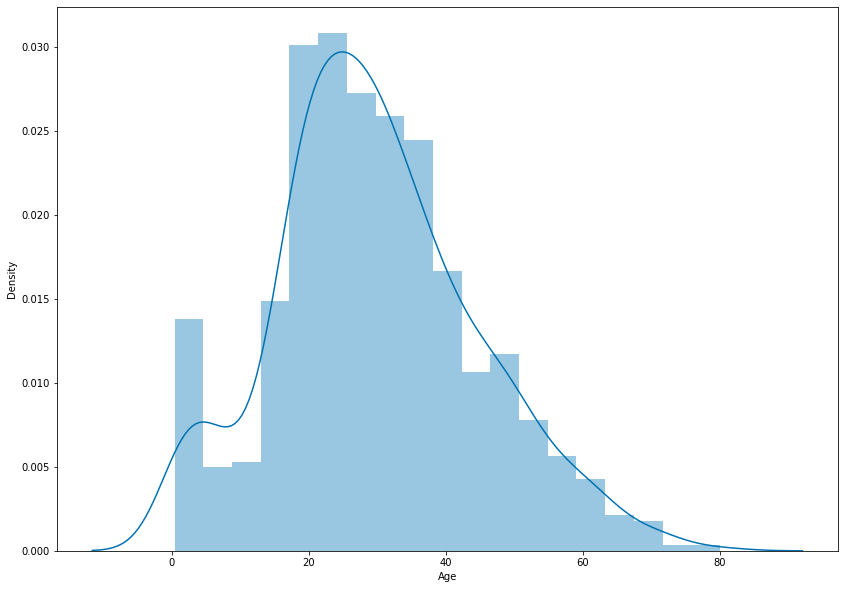

In [15]:
sns.distplot(titanic_dataset["Age"])

### Существует несколько подходов работы с пропущенными значениями:

- Удаление

- Заполнение

Удаление пропущенных значений - самый простой способ очистки данных.

In [16]:
def drop_missing(data,axis=0):
    """Creating additional dataset which is a copy of origin dataset 
        with dropped NA values"""
    data_copy = data.copy(deep=True)
    data_copy = data_copy.dropna(axis=axis,inplace=False)
    return data_copy

In [17]:
titanic_dataset_dropped_na = drop_missing(data=titanic_dataset)
titanic_dataset_dropped_na.shape

(674, 6)

Достоинства удаления:

- этот метод не изменяет само распределение значений в переменной

Недостатки: 

- потеря полезной информации из датасета

<AxesSubplot:xlabel='Age', ylabel='Density'>

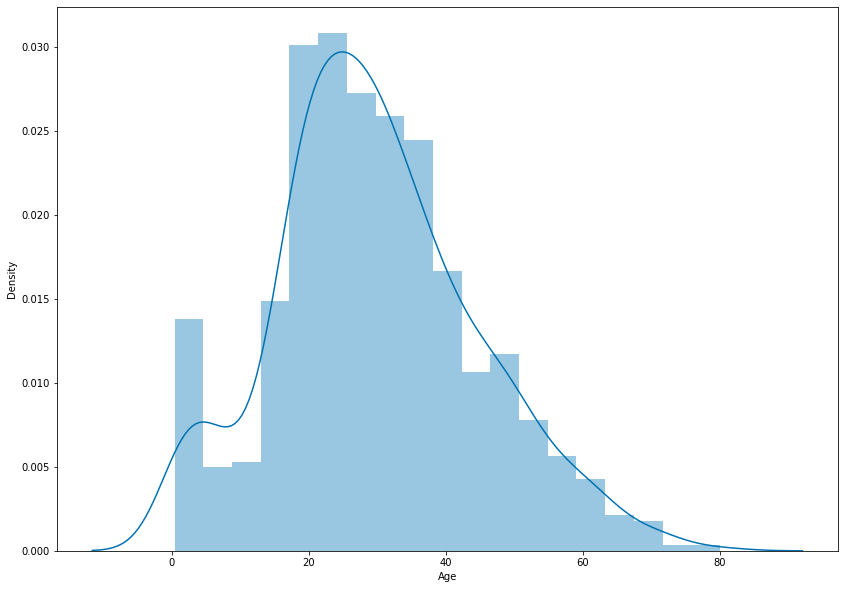

In [18]:
sns.distplot(titanic_dataset_dropped_na["Age"])

Добавление переменной оценки пропущенных значений

In [19]:
def add_var_denote_NA(data,NA_col=[]):
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_is_NA'] = np.where(data_copy[i].isnull(),1,0)
        else:
            warn("Нет пропущенных значений" % i)          
    return data_copy

In [20]:
titanic_dataset_denoted_na = add_var_denote_NA(data=titanic_dataset,NA_col=['Age'])
print(titanic_dataset_denoted_na.Age_is_NA.value_counts())
titanic_dataset_denoted_na.head(8)

0    674
1    102
Name: Age_is_NA, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Fare,Age_is_NA
0,0,3,male,22.0,1,7.2500,0
1,1,1,female,38.0,1,71.2833,0
2,1,3,female,26.0,0,7.9250,0
3,1,1,female,35.0,1,53.1000,0
4,0,3,male,35.0,0,8.0500,0
5,0,3,male,NaN,0,8.4583,1
6,0,1,male,54.0,0,51.8625,0
7,0,3,male,2.0,3,21.0750,0


<AxesSubplot:xlabel='Age_is_NA', ylabel='Density'>

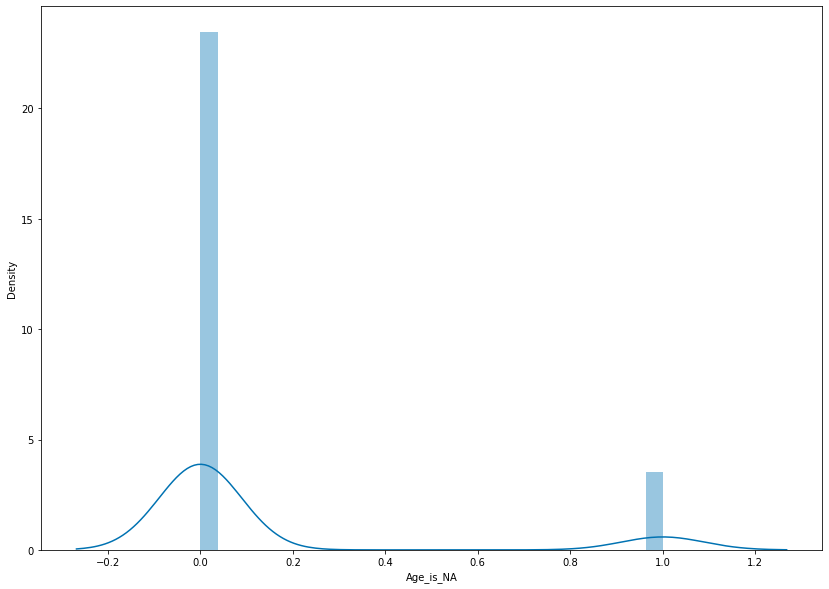

In [21]:
sns.distplot(titanic_dataset_denoted_na["Age_is_NA"])

Достоинства: 

- нет преобразований исходного датасета
- добавление переменных, объясняющих другие переменные

Недостатки:

- расширение пространства признаков модели, что не всегда хорошо 
- появление строго-мультиколинеарных признаков - ломает некоторые алгоритмы

Заполнение пропусков выборочным значением

In [22]:
def impute_NA_with_arbitrary(data,impute_value,NA_col=[]):  
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_'+str(impute_value)] = data_copy[i].fillna(impute_value)
        else:
            warn("Нет пропущенных значений" % i)
    return data_copy

In [23]:
titanic_dataset_inputed_arbitrary = impute_NA_with_arbitrary(data=titanic_dataset,impute_value=-999,NA_col=['Age'])
titanic_dataset_inputed_arbitrary.head(8)
# Почему -999? Для того, чтобы лучше работали классификаторы. 
# Для нелинейных классификаоторов (random forest, например) это удобное значение для классификации
# Качество нелинейной модели должно улучшиться

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_-999
0,0,3,male,22.0,1,7.2500,22.0
1,1,1,female,38.0,1,71.2833,38.0
2,1,3,female,26.0,0,7.9250,26.0
3,1,1,female,35.0,1,53.1000,35.0
4,0,3,male,35.0,0,8.0500,35.0
5,0,3,male,NaN,0,8.4583,-999.0
6,0,1,male,54.0,0,51.8625,54.0
7,0,3,male,2.0,3,21.0750,2.0


<AxesSubplot:xlabel='Age_-999', ylabel='Density'>

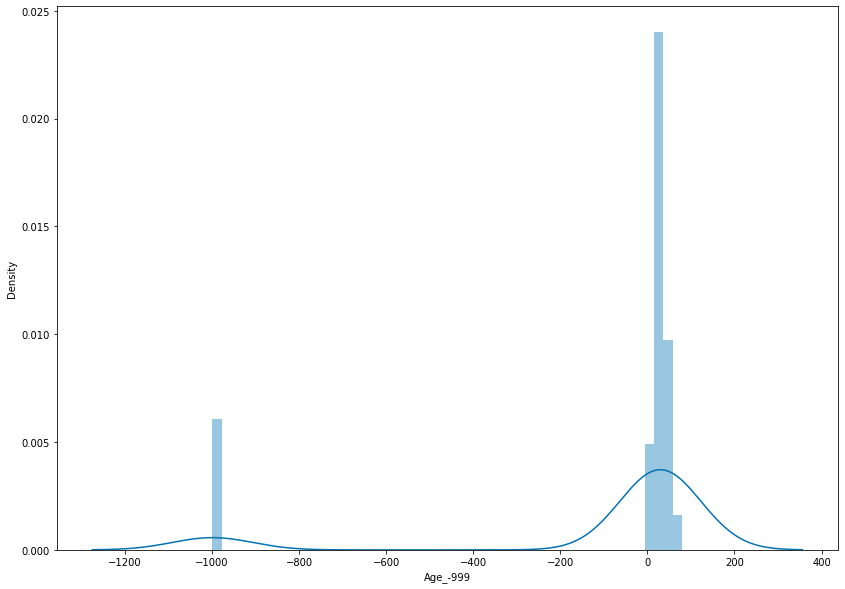

In [24]:
sns.distplot(titanic_dataset_inputed_arbitrary["Age_-999"])

Достоинства: 

- нет преобразований исходного датасета
- добавление переменных, объясняющих другие переменные
- подходит для нейлинейных моделей (чаще всего)

Недостатки:

- расширение пространства признаков модели, что не всегда хорошо 
- нарушение распределения данных в колонке - плохо для линейных моделей
- если очень много пропущенных значений - даже нелинейный алгоритм может плохо работать; если мало - алгоритм отнесёт их к выбросам; в общем, всё равно плохо и использовать стоит крайне аккуратно (а может и не использовать вообще)

Почему не заполнить NA на неестественное значение без добавления дополнительного признака? Ответ: при обучении модели не используется исходная колонка с данными, а только созданная. (но зачем?) 

Увеличение размерности за счёт добавления фичей - хорошо или плохо? It depends (c) Зависит от датасета, конечно же. 

Лучше не использовать циклы при переборе датасета. Есть более оптимальные функции.

Большие датасеты можно делить на батчи. 

Заполнение пропущенных значений средним/медианой/модой

In [25]:
def impute_NA_with_avg(data,strategy='mean',NA_col=[]):
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            if strategy=='mean':
                data_copy[i+'_impute_mean'] = data_copy[i].fillna(data[i].mean())
            elif strategy=='median':
                data_copy[i+'_impute_median'] = data_copy[i].fillna(data[i].median())
            elif strategy=='mode':
                data_copy[i+'_impute_mode'] = data_copy[i].fillna(data[i].mode()[0])
        else:
            warn("Нет пропущенных значений" % i)
    return data_copy  

In [26]:
print(titanic_dataset.Age.median())
titanic_dataset_by_strategy = impute_NA_with_avg(data=titanic_dataset,strategy='median',NA_col=['Age'])
titanic_dataset_by_strategy.head(8)

28.0


,Survived,Pclass,Sex,Age,SibSp,Fare,Age_impute_median
0,0,3,male,22.0,1,7.2500,22.0
1,1,1,female,38.0,1,71.2833,38.0
2,1,3,female,26.0,0,7.9250,26.0
3,1,1,female,35.0,1,53.1000,35.0
4,0,3,male,35.0,0,8.0500,35.0
5,0,3,male,NaN,0,8.4583,28.0
6,0,1,male,54.0,0,51.8625,54.0
7,0,3,male,2.0,3,21.0750,2.0


<AxesSubplot:xlabel='Age_impute_median', ylabel='Density'>

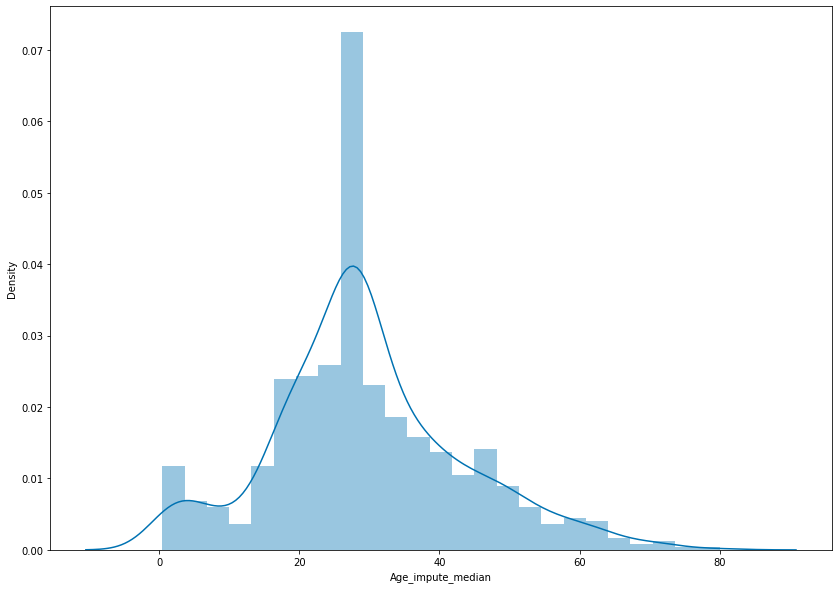

In [27]:
sns.distplot(titanic_dataset_by_strategy["Age_impute_median"])

В sklearn уже реализованы необходимые функции. Причём существует множество стратегий:
https://scikit-learn.org/stable/modules/impute.html

In [28]:
from sklearn.impute import SimpleImputer
simple_inputer = SimpleImputer(strategy="median")

titanic_dataset_imputed = titanic_dataset.copy()

In [29]:
tmp = titanic_dataset_imputed.drop(columns=["Survived"]).select_dtypes(include=['float64', 'int64'])
tmp.head(8)

,Pclass,Age,SibSp,Fare
0,3,22.0,1,7.2500
1,1,38.0,1,71.2833
2,3,26.0,0,7.9250
3,1,35.0,1,53.1000
4,3,35.0,0,8.0500
5,3,NaN,0,8.4583
6,1,54.0,0,51.8625
7,3,2.0,3,21.0750


In [30]:
titanic_dataset_imputed.loc[:, ["Pclass", "Age", "SibSp", "Fare"]] = simple_inputer.fit_transform(tmp)
titanic_dataset_imputed.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3.0,male,22.0,1.0,7.2500
1,1,1.0,female,38.0,1.0,71.2833
2,1,3.0,female,26.0,0.0,7.9250
3,1,1.0,female,35.0,1.0,53.1000
4,0,3.0,male,35.0,0.0,8.0500
5,0,3.0,male,28.0,0.0,8.4583
6,0,1.0,male,54.0,0.0,51.8625
7,0,3.0,male,2.0,3.0,21.0750
8,1,3.0,female,27.0,0.0,11.1333
9,1,2.0,female,14.0,1.0,30.0708


Альтернативный вариант обучения imputer'а.

In [31]:
titanic_dataset_imputed_alter = titanic_dataset.copy()
# titanic_dataset_imputed_alter['Age']
# titanic_dataset_imputed_alter[['Age']]
titanic_dataset_imputed_alter.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,NaN,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


In [32]:
simple_inputer_alter = SimpleImputer(strategy="mean")

simple_inputer_alter = simple_inputer_alter.fit(titanic_dataset_imputed_alter[['Age']])
titanic_dataset_imputed_alter[['Age']] = simple_inputer_alter.transform(titanic_dataset_imputed_alter[['Age']])
titanic_dataset_imputed_alter.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.000000,1,7.2500
1,1,1,female,38.000000,1,71.2833
2,1,3,female,26.000000,0,7.9250
3,1,1,female,35.000000,1,53.1000
4,0,3,male,35.000000,0,8.0500
5,0,3,male,29.819614,0,8.4583
6,0,1,male,54.000000,0,51.8625
7,0,3,male,2.000000,3,21.0750
8,1,3,female,27.000000,0,11.1333
9,1,2,female,14.000000,1,30.0708


<AxesSubplot:xlabel='Age', ylabel='Density'>

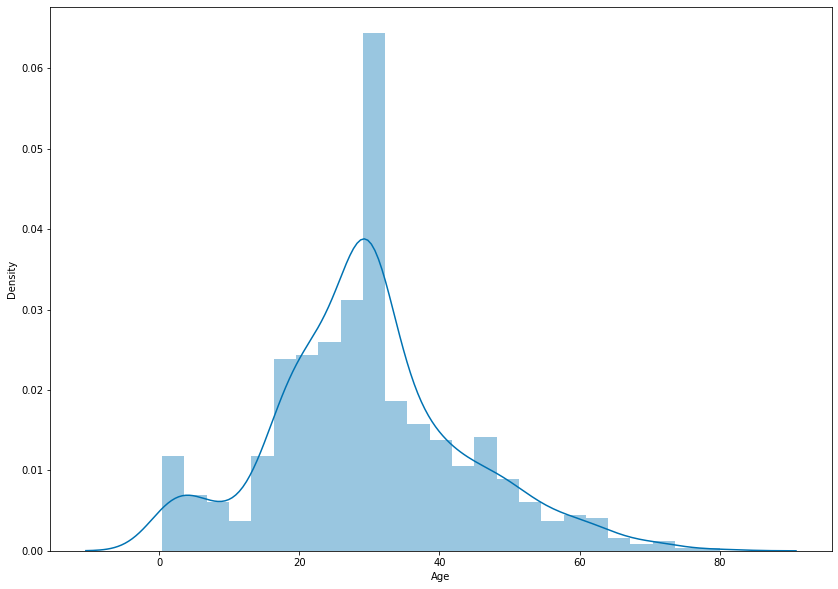

In [33]:
sns.distplot(titanic_dataset_imputed_alter["Age"])

Какую стратегию лучше всего использовать? It depends (c)

Чаще всего на практике используют среднее, но и у среднего есть недостатки - подверженность влиянию выбросов. Если много выбросов - лучше использовать медиану, т. к. она более робастна (устойчива к выбросам). 

Недостатки: 

- могут возникнуть изменения в корреляции между переменными

Заполнение пропусков значением из "хвоста" распределения

In [34]:
def impute_NA_with_end_of_distribution(data,NA_col=[]):
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_impute_end_of_distri'] = data_copy[i].fillna(data[i].mean()+3*data[i].std())
        else:
            warn("Нет пропущенных значений" % i)
    return data_copy

In [35]:
titanic_dataset_end_distr = impute_NA_with_end_of_distribution(data=titanic_dataset,NA_col=['Age'])
titanic_dataset_end_distr.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_impute_end_of_distri
0,0,3,male,22.0,1,7.2500,22.000000
1,1,1,female,38.0,1,71.2833,38.000000
2,1,3,female,26.0,0,7.9250,26.000000
3,1,1,female,35.0,1,53.1000,35.000000
4,0,3,male,35.0,0,8.0500,35.000000
5,0,3,male,NaN,0,8.4583,74.055743
6,0,1,male,54.0,0,51.8625,54.000000
7,0,3,male,2.0,3,21.0750,2.000000


<AxesSubplot:xlabel='Age_impute_end_of_distri', ylabel='Density'>

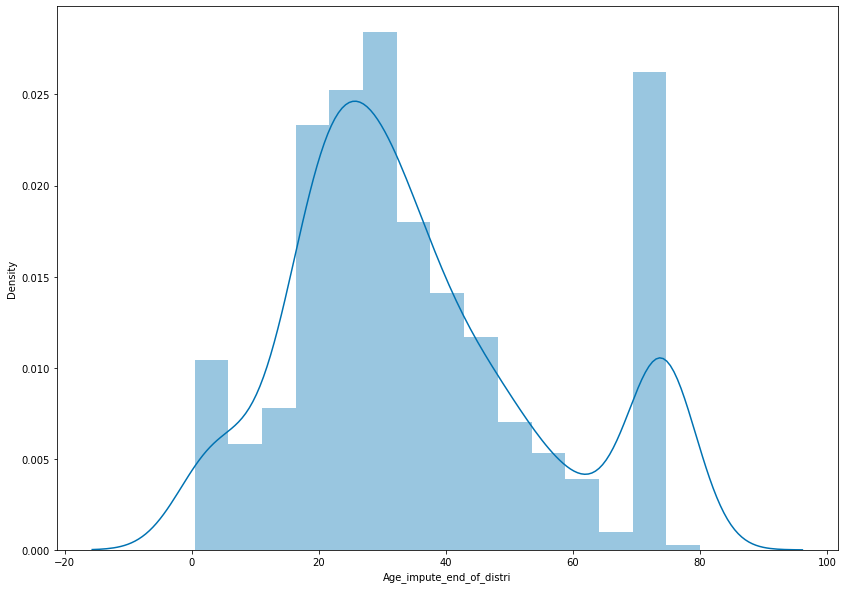

In [36]:
sns.distplot(titanic_dataset_end_distr["Age_impute_end_of_distri"])

Среднее + 3 сигма. 

Достоинства:

- нет преобразований исходного датасета

Недостатки:

- нарушение распределения? 
- маскировка выбросов (не ясно, что представляет из себя полученное значение - выброс или нет?)

Заполнение пропусков случайными значениями

In [37]:
def impute_NA_with_random(data,NA_col=[],random_state=0):
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i+'_random'] = data_copy[i]
            random_sample = data_copy[i].dropna().sample(data_copy[i].isnull().sum(), random_state=random_state)
            random_sample.index = data_copy[data_copy[i].isnull()].index
            data_copy.loc[data_copy[i].isnull(), str(i)+'_random'] = random_sample
        else:
            warn("Нет пропущенных значений" % i)
    return data_copy 

In [38]:
titanic_dataset_rand_fill = impute_NA_with_random(data=titanic_dataset,NA_col=['Age'])
titanic_dataset_rand_fill.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_random
0,0,3,male,22.0,1,7.2500,22.0
1,1,1,female,38.0,1,71.2833,38.0
2,1,3,female,26.0,0,7.9250,26.0
3,1,1,female,35.0,1,53.1000,35.0
4,0,3,male,35.0,0,8.0500,35.0
5,0,3,male,NaN,0,8.4583,28.0
6,0,1,male,54.0,0,51.8625,54.0
7,0,3,male,2.0,3,21.0750,2.0


<AxesSubplot:xlabel='Age_random', ylabel='Density'>

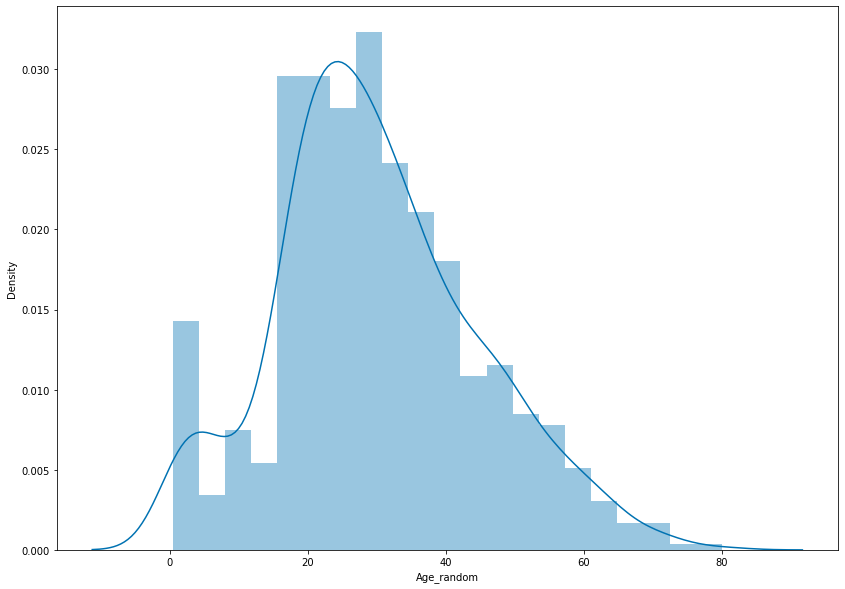

In [39]:
sns.distplot(titanic_dataset_rand_fill["Age_random"])

Достоинства:

- сохранение распределения

Недостатки:

- интерпретируемость хуже (для бизнес-задач, т. к. невозможно объяснить причины заполнения)

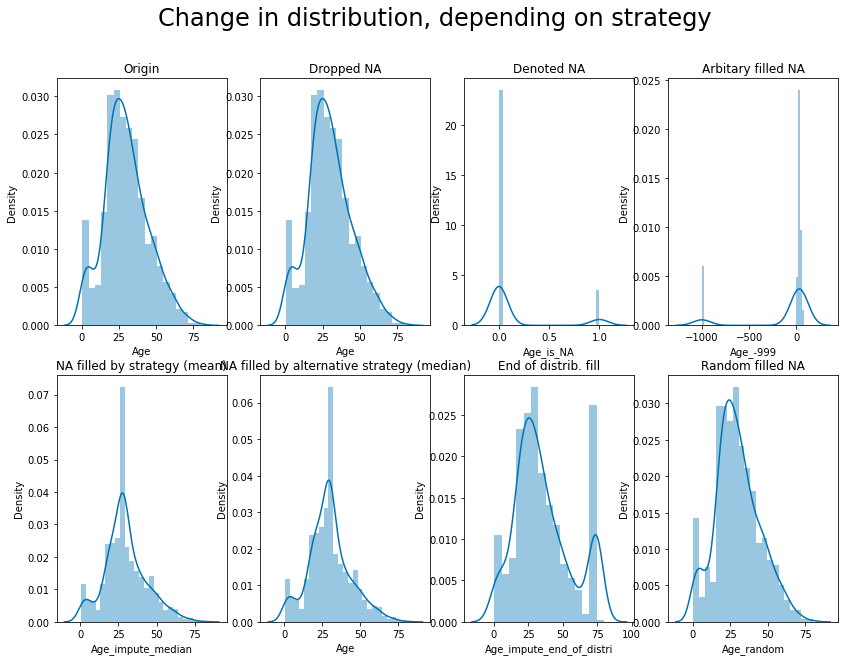

In [40]:
f, axes = plt.subplots(2, 4)

f.suptitle('Сhange in distribution, depending on strategy', fontsize=24)
sns.distplot(titanic_dataset["Age"], ax=axes[0, 0]).set_title("Origin")
sns.distplot(titanic_dataset_dropped_na["Age"], ax=axes[0, 1]).set_title("Dropped NA")
sns.distplot(titanic_dataset_denoted_na["Age_is_NA"], ax=axes[0, 2]).set_title("Denoted NA")
sns.distplot(titanic_dataset_inputed_arbitrary["Age_-999"], ax=axes[0, 3]).set_title("Arbitary filled NA")
sns.distplot(titanic_dataset_by_strategy["Age_impute_median"], ax=axes[1, 0]).set_title("NA filled by strategy (mean)")
sns.distplot(titanic_dataset_imputed_alter["Age"], ax=axes[1, 1]).set_title("NA filled by alternative strategy (median)")
sns.distplot(titanic_dataset_end_distr["Age_impute_end_of_distri"], ax=axes[1, 2]).set_title("End of distrib. fill")
sns.distplot(titanic_dataset_rand_fill["Age_random"], ax=axes[1, 3]).set_title("Random filled NA");

Помимо указанных существуют методы с использованием машинного обучения - kNN, деревья решений.

## Выбросы

Детекция с помощью выборочных значений

Сначала проводим EDA и выделяем некоторые границы - верхнюю и нижнюю для каждой переменной. В зависимости от попадания (или не попадания) значений в указанный интервал их можно классифицировать как выбросы.

In [41]:
def outlier_detect_arbitrary(data, col, upper_fence, lower_fence):
    para = (upper_fence, lower_fence)
    tmp = pd.concat([data[col] > upper_fence, data[col] < lower_fence], axis=1)
    outlier_index = tmp.any(axis=1)
    print('Количество выбросов в данных:', outlier_index.value_counts()[1])
    print('Доля выбросов:', outlier_index.value_counts()[1]/len(outlier_index))    
    return(outlier_index, para)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

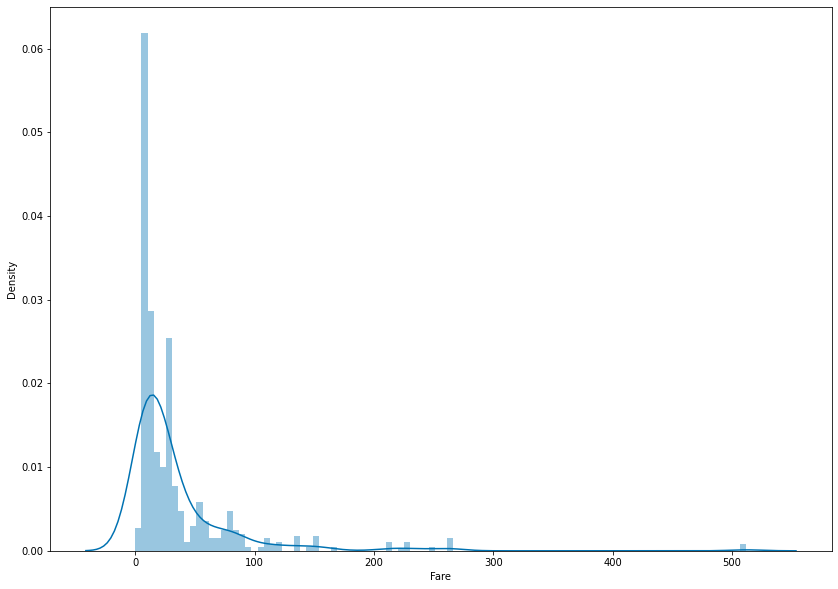

In [42]:
sns.distplot(titanic_dataset["Fare"], bins=100)

<AxesSubplot:ylabel='Fare'>

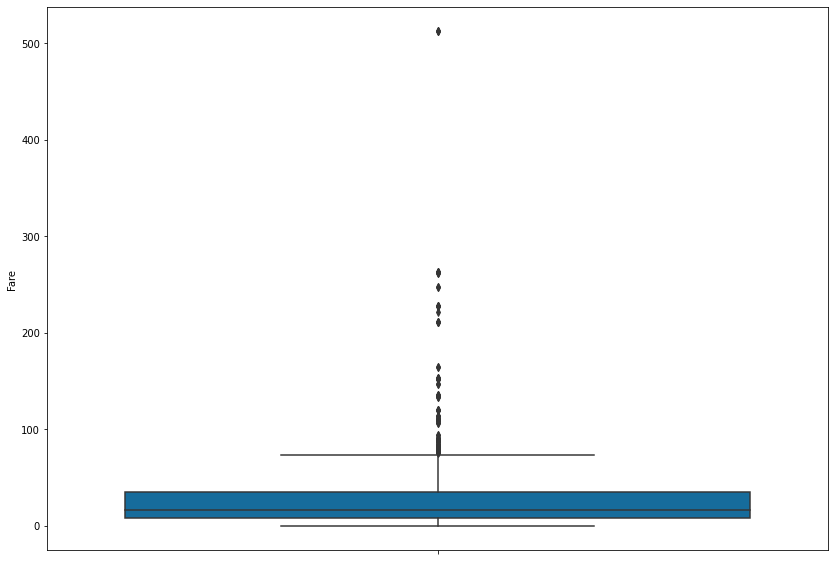

In [43]:
sns.boxplot(data=titanic_dataset, y="Fare")
# sns.swarmplot(data=titanic_dataset, y="Fare", color=".25")

<AxesSubplot:ylabel='Fare'>

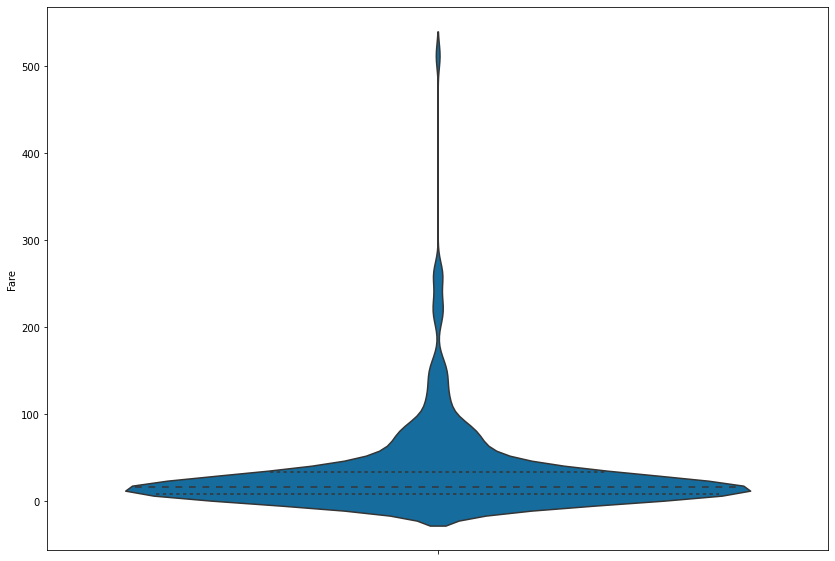

In [44]:
sns.violinplot(data=titanic_dataset, y="Fare", inner="quartile")

<AxesSubplot:ylabel='Fare'>

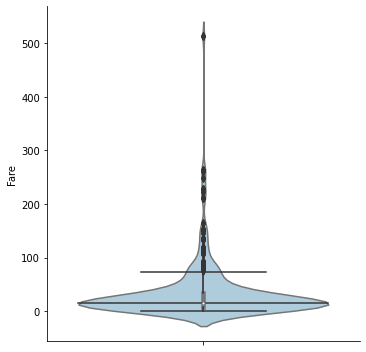

In [45]:
g = sns.catplot(data=titanic_dataset, y="Fare", kind="violin", inner='boxen', palette="Paired")
sns.boxplot(data=titanic_dataset, y="Fare", showbox=False, ax=g.ax)

In [46]:
index, para = outlier_detect_arbitrary(data=titanic_dataset,col='Fare',upper_fence=100,lower_fence=5)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Количество выбросов в данных: 63
Доля выбросов: 0.08118556701030928
Верхняя граница: 100 
Нижняя граница: 5


In [47]:
titanic_dataset.loc[index,'Fare'].sort_values()

263      0.0000
806      0.0000
302      0.0000
179      0.0000
597      0.0000
         ...   
88     263.0000
27     263.0000
679    512.3292
737    512.3292
258    512.3292
Name: Fare, Length: 63, dtype: float64

Интерквартильное расстояние

In [48]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col] > Upper_fence, data[col] < Lower_fence], axis=1)
    outlier_index = tmp.any(axis=1)
    print('Количество выбросов в данных:', outlier_index.value_counts()[1])
    print('Доля выбросов:', outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [49]:
index, para = outlier_detect_IQR(data=titanic_dataset, col='Fare', threshold=5)
print('Верхняя граница:', para[0], '\nНижняя граница:', para[1])

Количество выбросов в данных: 20
Доля выбросов: 0.02577319587628866
Верхняя граница: 166.0 
Нижняя граница: -123.575


In [50]:
titanic_dataset.loc[index,'Fare'].sort_values()

779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
716    227.5250
700    227.5250
380    227.5250
557    227.5250
118    247.5208
299    247.5208
311    262.3750
742    262.3750
27     263.0000
341    263.0000
88     263.0000
438    263.0000
258    512.3292
737    512.3292
679    512.3292
Name: Fare, dtype: float64

Среднее-среднеквадратичное отклонение

In [51]:
def outlier_detect_mean_std(data, col, threshold = 3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col] > Upper_fence, data[col] < Lower_fence], axis=1)
    outlier_index = tmp.any(axis=1)
    print('Количество выбросов в данных:', outlier_index.value_counts()[1])
    print('Доля выбросов:', outlier_index.value_counts()[1]/len(outlier_index))
    return(outlier_index, para)

In [59]:
index, para = outlier_detect_mean_std(data=titanic_dataset, col='Fare', threshold=3)
print('Верхняя граница:', para[0], '\nНижняя граница:', para[1])

Количество выбросов в данных: 20
Доля выбросов: 0.02577319587628866
Верхняя граница: 192.0543797756689 
Нижняя граница: -122.11775013649365


Имеет смысл применять только для данных, имеющих нормальное распределение.

In [53]:
# sns.distplot(np.log(titanic_dataset["Fare"]+.01), bins=30)

In [54]:
titanic_dataset.loc[index,'Fare'].sort_values()

779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
716    227.5250
700    227.5250
380    227.5250
557    227.5250
118    247.5208
299    247.5208
311    262.3750
742    262.3750
27     263.0000
341    263.0000
88     263.0000
438    263.0000
258    512.3292
737    512.3292
679    512.3292
Name: Fare, dtype: float64

Медианы абсолютного отклонения (MAD) - https://en.wikipedia.org/wiki/Median_absolute_deviation

In [55]:
def outlier_detect_MAD(data, col, threshold=3.5):
    median = data[col].median()
    median_absolute_deviation = np.median([np.abs(y - median) for y in data[col]])
    modified_z_scores = pd.Series([0.6745 * (y - median) / median_absolute_deviation for y in data[col]])
    outlier_index = np.abs(modified_z_scores) > threshold
    print('Количество выбросов в данных:', outlier_index.value_counts()[1])
    print('Доля выбросов:', outlier_index.value_counts()[1]/len(outlier_index))
    return(outlier_index)

In [56]:
index = outlier_detect_MAD(data=titanic_dataset, col='Fare', threshold=3.5)

Количество выбросов в данных: 116
Доля выбросов: 0.14948453608247422


Замена выброса выборочным значением

Конкретно в данном случае необходимо сначала применить метод детекции выбросов (например, интерквартильное расстояние), а потом замену выбросов.

In [57]:
def impute_outlier_with_arbitrary(data, outlier_index, value, col=[]):
    data_copy = data.copy(deep=True)
    for i in col:
        data_copy.loc[outlier_index,i] = value
    return data_copy

In [60]:
titanic_dataset_outlier_arb = impute_outlier_with_arbitrary(data=titanic_dataset, outlier_index=index,
                                         value=-999, col=['Fare'])
titanic_dataset_outlier_arb[25:35]

,Survived,Pclass,Sex,Age,SibSp,Fare
25,1,3,female,38.0,1,31.3875
26,0,3,male,NaN,0,7.2250
27,0,1,male,19.0,3,-999.0000
28,1,3,female,NaN,0,7.8792
29,0,3,male,NaN,0,7.8958
30,0,1,male,40.0,0,27.7208
31,1,1,female,NaN,1,146.5208
32,1,3,female,NaN,0,7.7500
33,0,2,male,66.0,0,10.5000
34,0,1,male,28.0,1,82.1708


Виндзоризация

{92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, −40, 101, 86, 85, 15, 89, 89, 28, −5, 41}  

{92, 19, 101, 58, 101, 91, 26, 78, 10, 13, −5, 101, 86, 85, 15, 89, 89, 28, −5, 41} 

In [61]:
def windsorization(data, col, para, strategy='both'):
    data_copy = data.copy(deep=True)  
    if strategy == 'both':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
        data_copy.loc[data_copy[col]<para[1],col] = para[1]
    elif strategy == 'top':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
    elif strategy == 'bottom':
        data_copy.loc[data_copy[col]<para[1],col] = para[1]  
    return(data_copy)

In [62]:
titanic_dataset_windsorization = windsorization(data=titanic_dataset, col='Fare', para=para, strategy='both')
titanic_dataset_windsorization[25:35] # 27, 31

,Survived,Pclass,Sex,Age,SibSp,Fare
25,1,3,female,38.0,1,31.38750
26,0,3,male,NaN,0,7.22500
27,0,1,male,19.0,3,192.05438
28,1,3,female,NaN,0,7.87920
29,0,3,male,NaN,0,7.89580
30,0,1,male,40.0,0,27.72080
31,1,1,female,NaN,1,146.52080
32,1,3,female,NaN,0,7.75000
33,0,2,male,66.0,0,10.50000
34,0,1,male,28.0,1,82.17080


Уже реализовано в scipy. Удобно. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

In [63]:
from scipy.stats.mstats import winsorize

titanic_dataset_scipy_winsorize = titanic_dataset.copy()

titanic_scipy_winsorize_fare = winsorize(titanic_dataset['Fare'], limits=[0.1, 0.1])
print(titanic_scipy_winsorize_fare.data[25:35])

titanic_dataset_scipy_winsorize['Fare'] = titanic_scipy_winsorize_fare.data
titanic_dataset_scipy_winsorize[25:35]

[31.3875  7.65   79.65    7.8792  7.8958 27.7208 79.65    7.75   10.5
 79.65  ]


,Survived,Pclass,Sex,Age,SibSp,Fare
25,1,3,female,38.0,1,31.3875
26,0,3,male,NaN,0,7.6500
27,0,1,male,19.0,3,79.6500
28,1,3,female,NaN,0,7.8792
29,0,3,male,NaN,0,7.8958
30,0,1,male,40.0,0,27.7208
31,1,1,female,NaN,1,79.6500
32,1,3,female,NaN,0,7.7500
33,0,2,male,66.0,0,10.5000
34,0,1,male,28.0,1,79.6500


Ещё можно использовать пандасовский метод clip: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.clip.html

In [64]:
titanic_dataset_clipped = titanic_dataset.copy()
print(titanic_dataset_clipped['Fare'].quantile(0.05), titanic_dataset_clipped['Fare'].quantile(0.95))
titanic_dataset_clipped['Fare'] = titanic_dataset_clipped['Fare'].clip(lower=titanic_dataset_clipped['Fare'].quantile(0.05),
                                                                       upper=titanic_dataset_clipped['Fare'].quantile(0.95))
titanic_dataset_clipped[25:35]

7.225 120.0


,Survived,Pclass,Sex,Age,SibSp,Fare
25,1,3,female,38.0,1,31.3875
26,0,3,male,NaN,0,7.2250
27,0,1,male,19.0,3,120.0000
28,1,3,female,NaN,0,7.8792
29,0,3,male,NaN,0,7.8958
30,0,1,male,40.0,0,27.7208
31,1,1,female,NaN,1,120.0000
32,1,3,female,NaN,0,7.7500
33,0,2,male,66.0,0,10.5000
34,0,1,male,28.0,1,82.1708


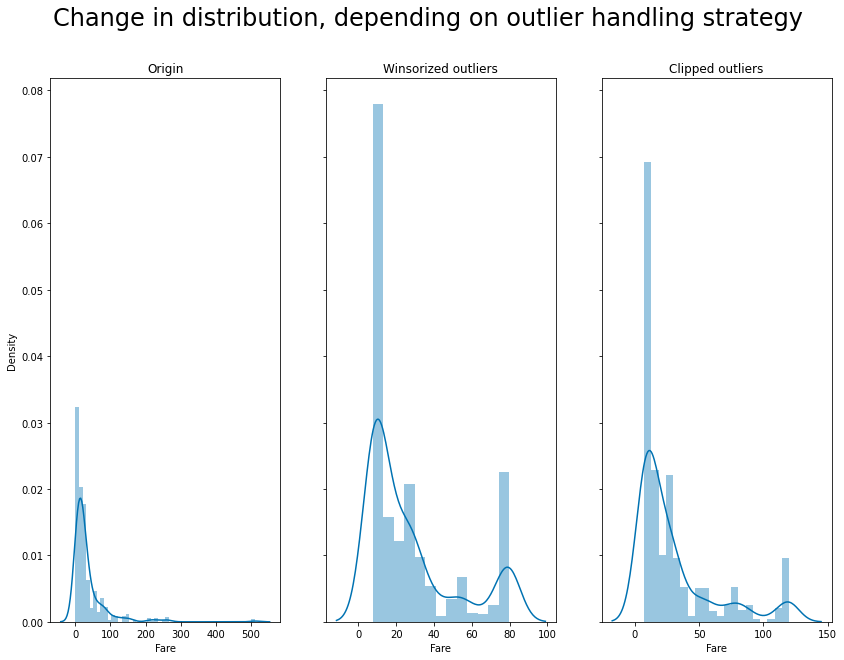

In [92]:
f, axes = plt.subplots(1, 3, sharey=True)

f.suptitle('Сhange in distribution, depending on outlier handling strategy', fontsize=24)
sns.distplot(titanic_dataset["Fare"], ax=axes[0]).set_title("Origin")
sns.distplot(titanic_dataset_scipy_winsorize["Fare"], ax=axes[1]).set_title("Winsorized outliers")
sns.distplot(titanic_dataset_clipped["Fare"], ax=axes[2]).set_title("Clipped outliers");

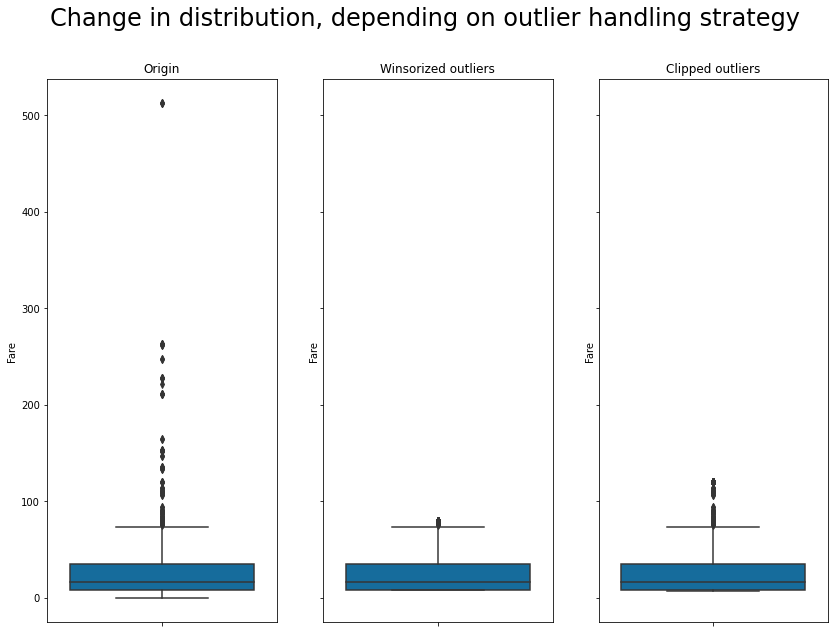

In [93]:
f, axes = plt.subplots(1, 3, sharey=True)

f.suptitle('Сhange in distribution, depending on outlier handling strategy', fontsize=24)
sns.boxplot(y=titanic_dataset["Fare"], ax=axes[0]).set_title("Origin")
sns.boxplot(y=titanic_dataset_scipy_winsorize["Fare"], ax=axes[1]).set_title("Winsorized outliers")
sns.boxplot(y=titanic_dataset_clipped["Fare"], ax=axes[2]).set_title("Clipped outliers");

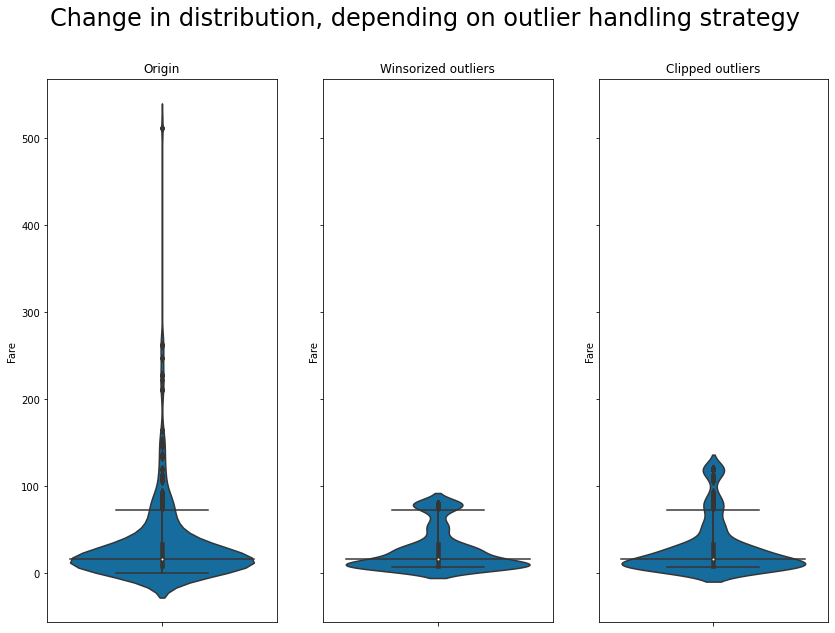

In [69]:
f, axes = plt.subplots(1, 3, sharey=True)

f.suptitle('Сhange in distribution, depending on outlier handling strategy', fontsize=24)
sns.boxplot(y=titanic_dataset["Fare"], showbox = False, ax=axes[0]).set_title("Origin")
sns.violinplot(y=titanic_dataset["Fare"], ax=axes[0])
sns.boxplot(y=titanic_dataset_scipy_winsorize["Fare"], showbox = False, ax=axes[1]).set_title("Winsorized outliers")
sns.violinplot(y=titanic_dataset_scipy_winsorize["Fare"], ax=axes[1])
sns.boxplot(y=titanic_dataset_clipped["Fare"], showbox = False, ax=axes[2]).set_title("Clipped outliers")
sns.violinplot(y=titanic_dataset_clipped["Fare"], ax=axes[2]);

Удаление выбросов

In [70]:
def drop_outlier(data, outlier_index):
    data_copy = data[~outlier_index]
    return(data_copy)

In [71]:
titanic_dataset_dropped_outliers = drop_outlier(data=titanic_dataset, outlier_index=index)
print(titanic_dataset_dropped_outliers.Fare.max())
print(titanic_dataset_dropped_outliers.Fare.min())

164.8667
0.0


Замена выбросов средним/медианой/модой

In [72]:
def impute_outlier_with_avg(data, col, outlier_index, strategy='mean'):
    data_copy = data.copy(deep=True)
    if strategy == 'mean':
        data_copy.loc[outlier_index,col] = data_copy[col].mean()
    elif strategy == 'median':
        data_copy.loc[outlier_index,col] = data_copy[col].median()
    elif strategy == 'mode':
        data_copy.loc[outlier_index,col] = data_copy[col].mode()[0]           
    return(data_copy)

In [73]:
titanic_dataset_outlier_avg = impute_outlier_with_avg(data=titanic_dataset, col='Fare',
                                   outlier_index=index, strategy='mean')
titanic_dataset_outlier_avg[25:35]

,Survived,Pclass,Sex,Age,SibSp,Fare
25,1,3,female,38.0,1,31.387500
26,0,3,male,NaN,0,7.225000
27,0,1,male,19.0,3,34.968315
28,1,3,female,NaN,0,7.879200
29,0,3,male,NaN,0,7.895800
30,0,1,male,40.0,0,27.720800
31,1,1,female,NaN,1,146.520800
32,1,3,female,NaN,0,7.750000
33,0,2,male,66.0,0,10.500000
34,0,1,male,28.0,1,82.170800


In [74]:
# Ещё один способ удаления выбросов
# ---------------------------------------
# cols = ['col_1', 'col_2'] # one or more

# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# ---------------------------------------

Q1 = titanic_dataset["Fare"].quantile(0.05)
Q3 = titanic_dataset["Fare"].quantile(0.95)
IQR = Q3 - Q1

titanic_dataset_outliers_selection = titanic_dataset[~((titanic_dataset["Fare"] < (Q1 - 1.5 * IQR)) | 
                                                       (titanic_dataset["Fare"] > (Q3 + 1.5 * IQR)))]

titanic_dataset_outliers_selection[25:35]

,Survived,Pclass,Sex,Age,SibSp,Fare
25,1,3,female,38.0,1,31.3875
26,0,3,male,NaN,0,7.2250
27,0,1,male,19.0,3,263.0000
28,1,3,female,NaN,0,7.8792
29,0,3,male,NaN,0,7.8958
30,0,1,male,40.0,0,27.7208
31,1,1,female,NaN,1,146.5208
32,1,3,female,NaN,0,7.7500
33,0,2,male,66.0,0,10.5000
34,0,1,male,28.0,1,82.1708


<AxesSubplot:ylabel='Fare'>

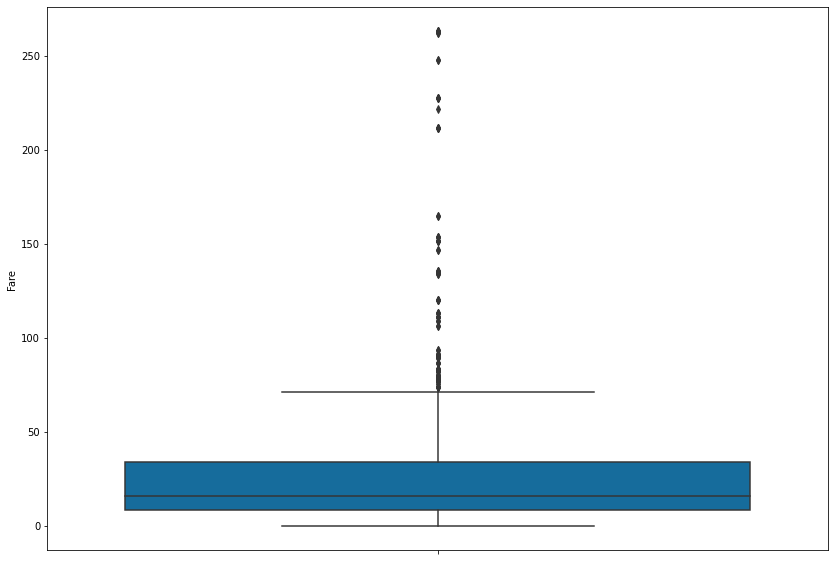

In [75]:
sns.boxplot(y=titanic_dataset_outliers_selection["Fare"])

##  Шкалирование данных

Шкалирование позволяет подготовить данные к использованию в алгоритме. 

Чем больше масштаб данных - тем больший вес им придаёт алгоритм. Это как минимум методологически неверно. 

В алгоритмах, использующих градиентный спуск очень важно, произведено ли шкалирование. Шкалирование влияет на сходимость.

Алгоритмы, основанные на метриках расстояния (kNN, SVM) очень чувствительны к шкалированию.

Деревья решений не очень чувствительны.

В любом случае, если выбирать между тем, чтобы шкалировать или не шкалировать - **нужно выбирать шкалирование!**

In [76]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dataset, titanic_dataset.Survived, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((620, 6), (156, 6))

Нормализация данных

$z = (X - X_{mean}) / X_{std}$

In [77]:
ss = StandardScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_zscore'] = ss.transform(X_train_copy[['Fare']])
X_train_copy.head(6) 

,Survived,Pclass,Sex,Age,SibSp,Fare,Fare_zscore
487,0,1,male,58.0,0,29.700,-0.098053
246,0,3,female,25.0,0,7.775,-0.529131
126,0,3,male,NaN,0,7.750,-0.529623
270,0,1,male,NaN,0,31.000,-0.072493
166,1,1,female,NaN,0,55.000,0.399383
298,1,1,male,NaN,0,30.500,-0.082324


In [78]:
print(X_train_copy['Fare_zscore'].mean())
print(X_train_copy['Fare_zscore'].std())

-3.4381100117424204e-17
1.0008074284722805


Достоинства:

- самый простой и частоиспользуемый метод
- эффективен в большинстве случаев

Недостатки: 

- чувствительность к выбросам (если выбросы должным образом не обработаны на предыдущих этапах - могут возникнуть проблемы)

Мин-Макс шкалирование

$X_{scaled} = (X - X_{min}) / (X_{max} - X_{min}) $

In [79]:
mms = MinMaxScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_minmax'] = mms.transform(X_train_copy[['Fare']])
X_train_copy.head(6)

,Survived,Pclass,Sex,Age,SibSp,Fare,Fare_minmax
487,0,1,male,58.0,0,29.700,0.057971
246,0,3,female,25.0,0,7.775,0.015176
126,0,3,male,NaN,0,7.750,0.015127
270,0,1,male,NaN,0,31.000,0.060508
166,1,1,female,NaN,0,55.000,0.107353
298,1,1,male,NaN,0,30.500,0.059532


In [80]:
print(X_train_copy['Fare_minmax'].max())
print(X_train_copy['Fare_minmax'].min())

1.0
0.0


Достоинства:

- простой метод
- эффективен для данных, имеющих высокую волатильность (ярко выраженные минимальные и максимальные значения)

Недостатки: 

- чувствительность к выбросам (если выбросы должным образом не обработаны на предыдущих этапах - могут возникнуть проблемы)

Робастное шкалирование

$X_{scaled} = (X - X_{median}) / IQR$

$IQR = Q3 - Q1$

In [82]:
rs = RobustScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_robust'] = rs.transform(X_train_copy[['Fare']])
X_train_copy.head(6)

,Survived,Pclass,Sex,Age,SibSp,Fare,Fare_robust
487,0,1,male,58.0,0,29.700,0.516619
246,0,3,female,25.0,0,7.775,-0.316239
126,0,3,male,NaN,0,7.750,-0.317189
270,0,1,male,NaN,0,31.000,0.566002
166,1,1,female,NaN,0,55.000,1.477683
298,1,1,male,NaN,0,30.500,0.547009


Подходит для данных с большим количеством пиков, выбросов - типа временных рядов и подобного. 

Для более-менее нормального распределения признака - особого смысла нет. 

## Энкодинг переменных 

Энкодинг - перевод категориальных (номинативных) переменных в числовые. 

Большая часть алгоритмов МО не могут работать с категориальными переменными, поэтому нужен энкодинг.

One-Hot encoding - замена переменных булевыми значениями (0 и 1).

In [83]:
titanic_dataset_encoded_1 = pd.get_dummies(titanic_dataset, drop_first=True)

In [84]:
titanic_dataset_encoded_1.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_male
0,0,3,22.0,1,7.2500,1
1,1,1,38.0,1,71.2833,0
2,1,3,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,0,3,35.0,0,8.0500,1


В sklearn - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [94]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')

Однако, сообщество рекомендует вместо OneHotEncoder'а использовать LabelEncoder.

Достоинства:

- интерпретируемость
- вся информация о переменной сохраняется

Недостатки:

- количество признаков увеличивается в зависимости от градаций признака

Энкодинг значением

In [85]:
ord_enc = ce.OrdinalEncoder(cols=['Sex']).fit(X_train,y_train)

In [87]:
titanic_dataset_encoded_2 = ord_enc.transform(titanic_dataset)
titanic_dataset_encoded_2.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,2,38.0,1,71.2833
2,1,3,2,26.0,0,7.9250
3,1,1,2,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
5,0,3,1,NaN,0,8.4583
6,0,1,1,54.0,0,51.8625
7,0,3,1,2.0,3,21.0750
8,1,3,2,27.0,0,11.1333
9,1,2,2,14.0,1,30.0708


Таргет энкодинг

In [88]:
target_enc = ce.TargetEncoder(cols=['Sex']).fit(X_train,y_train)

In [89]:
titanic_dataset_encoded_3 = target_enc.transform(titanic_dataset)
titanic_dataset_encoded_3.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,0.212276,22.0,1,7.2500
1,1,1,0.733624,38.0,1,71.2833
2,1,3,0.733624,26.0,0,7.9250
3,1,1,0.733624,35.0,1,53.1000
4,0,3,0.212276,35.0,0,8.0500


В задаче кластеризации этот метод будет работать хорошо. 

Достоинства:

- весьма туманны

Недостатки:

- вообще непонятно зачем всё это

WOE энкодинг - заменяем значение некоторым "весом" значения. 

In [90]:
woe_enc = ce.WOEEncoder(cols=['Sex']).fit(X_train,y_train)

In [91]:
titanic_dataset_encoded_4 = woe_enc.transform(titanic_dataset)
titanic_dataset_encoded_4.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,-0.919712,22.0,1,7.2500
1,1,1,1.385577,38.0,1,71.2833
2,1,3,1.385577,26.0,0,7.9250
3,1,1,1.385577,35.0,1,53.1000
4,0,3,-0.919712,35.0,0,8.0500


Удобно использовать в логистической регрессии.

Достоинства:

- весьма туманны

Недостатки:

- вообще непонятно зачем всё это

## Feature Selection

In [104]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [109]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [105]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [110]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis=1), 
                                                    data.target, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

Константные значения

Идея - задавать некий порог, с целью поиска константных значений в какой-либо переменной. Если таковые имеются, то эту переменную мы убираем из датасета и для тренировки алгоритма не используем. 

In [113]:
def constant_feature_detect(data, threshold=0.98):    
    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() / np.float(
                      len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),'константные переменные')    
    return(quasi_constant_feature)

In [114]:
quasi_constant_feature = constant_feature_detect(data=X_train, threshold=0.9)

0 константные переменные


In [115]:
X_train['dummy'] = np.floor(X_train['worst smoothness']*10)
X_train.dummy.value_counts() / np.float(len(X_train))

1.0    0.923077
0.0    0.068132
2.0    0.008791
Name: dummy, dtype: float64

In [116]:
quasi_constant_feature = constant_feature_detect(data=X_train,threshold=0.9)
quasi_constant_feature

1 константные переменные


['dummy']

In [117]:
X_train.drop(labels=quasi_constant_feature, axis=1, inplace=True)
print(X_train.shape)

(455, 30)


Метод зависит от интепретации данных. Если встречаются "шумовые" переменные, то имеет смысл их не использовать в выборке.

### Корреляционная фильтрация

В линейных моделях сильно коррелированные переменные стоит удалять, поскольку они уменьшают точность.

<AxesSubplot:>

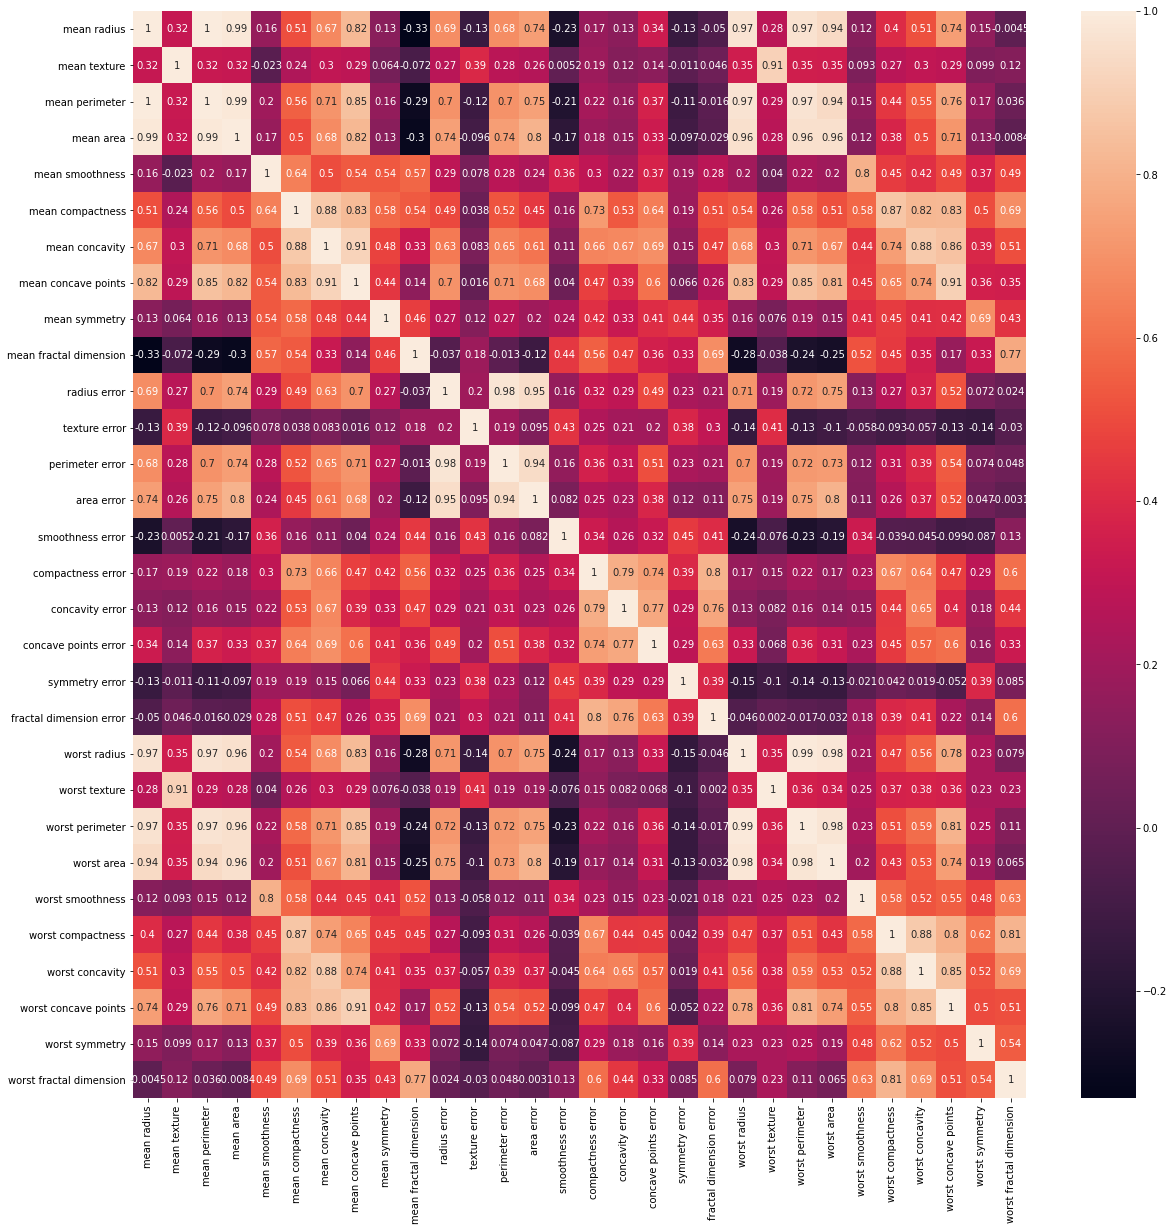

In [128]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(), annot=True)

<AxesSubplot:>

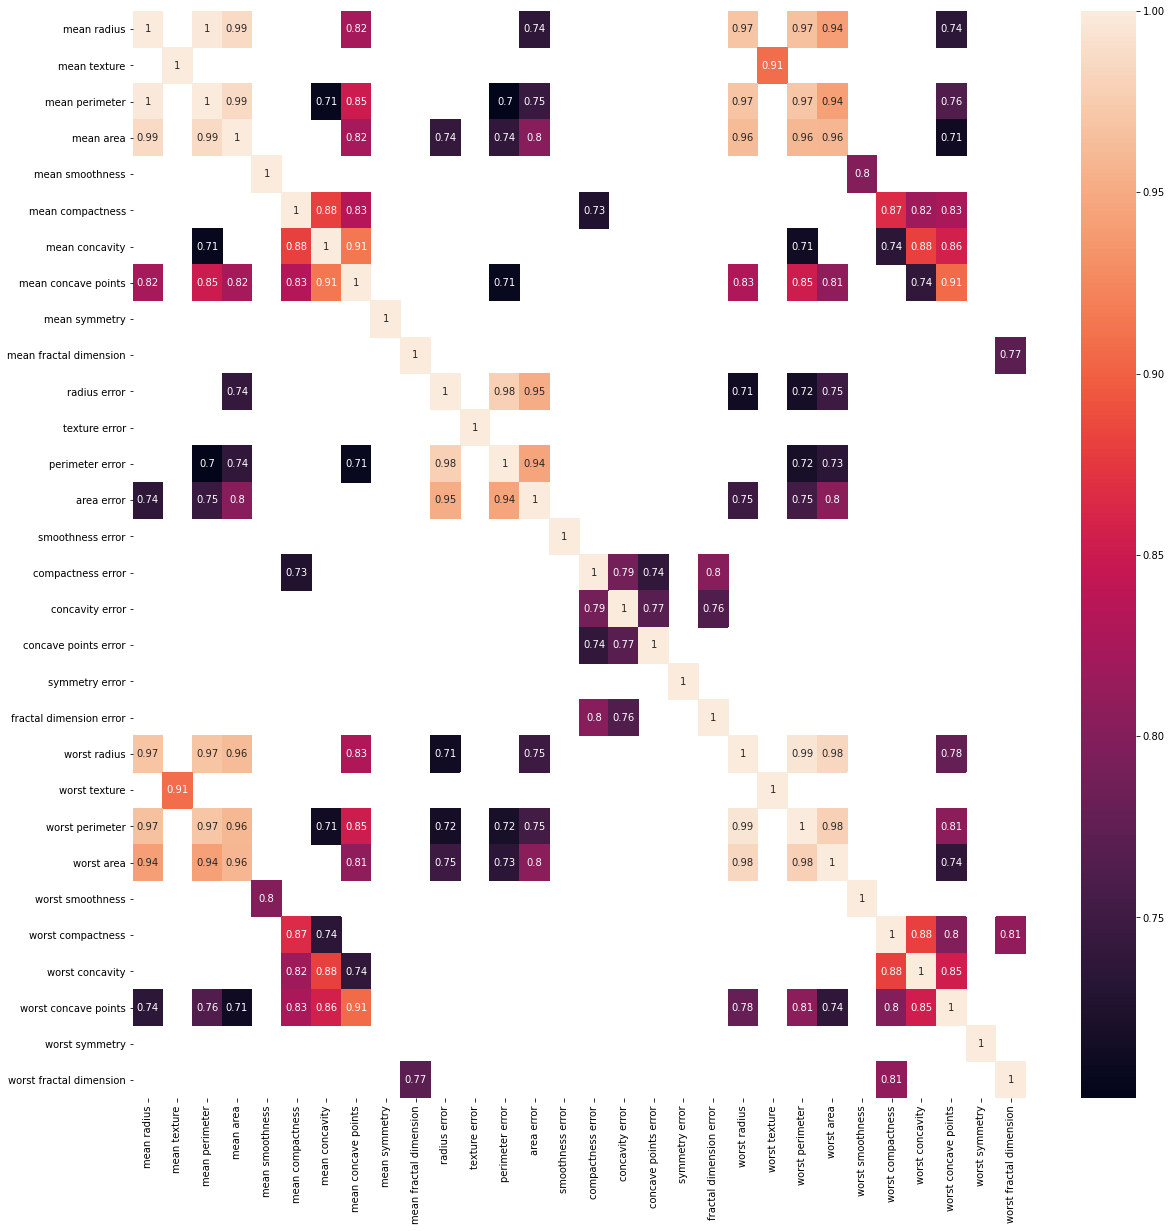

In [150]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr()[abs(X_train.corr()) > 0.7], annot=True)

In [163]:
high_corr_variables = X_train.corr()[abs(X_train.corr()) > 0.7].unstack().sort_values(ascending=False)
high_corr_variables[30:70]

mean radius          mean perimeter         0.998185
mean perimeter       mean radius            0.998185
worst radius         worst perimeter        0.994696
worst perimeter      worst radius           0.994696
mean radius          mean area              0.987094
mean area            mean radius            0.987094
                     mean perimeter         0.986692
mean perimeter       mean area              0.986692
worst area           worst radius           0.983841
worst radius         worst area             0.983841
worst area           worst perimeter        0.978816
worst perimeter      worst area             0.978816
radius error         perimeter error        0.978323
perimeter error      radius error           0.978323
mean perimeter       worst perimeter        0.970507
worst perimeter      mean perimeter         0.970507
mean radius          worst radius           0.969537
worst radius         mean radius            0.969537
                     mean perimeter         0.

In [120]:
def corr_feature_detect(data,threshold=0.8):
    
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() 
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] 
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            correlated_groups.append(correlated_block)
    return(correlated_groups)

In [121]:
corr = corr_feature_detect(data=X_train,threshold=0.9)
for i in corr:
    print(i,'\n')

          feature1         feature2      corr
0   mean perimeter      mean radius  0.998185
6   mean perimeter        mean area  0.986692
14  mean perimeter  worst perimeter  0.970507
19  mean perimeter     worst radius  0.969520
33  mean perimeter       worst area  0.941920 

           feature1      feature2      corr
12  perimeter error  radius error  0.978323
30  perimeter error    area error  0.944995 

          feature1             feature2      corr
36  mean concavity  mean concave points  0.914627 

        feature1       feature2      corr
38  mean texture  worst texture  0.908182 

                feature1             feature2      corr
40  worst concave points  mean concave points  0.906312 



In [167]:
from scipy import stats

cols = ['mean radius', 'mean area', 'worst perimeter', 'worst radius',
       'worst area', 'perimeter error', 'radius error', 'area error', 'mean concavity',
       'mean concave points', 'mean texture', 'worst texture', 'worst concave points', 'mean concave points']

for col in cols: 
    pearson_coef, p_value = stats.pearsonr(X_train[col], X_train['mean perimeter'])
    print("PearsonR между {} и price {} с P-значением P = {}".format(
          col, pearson_coef, p_value ))
    
    if p_value < 0.001:
        print('Корреляция между {} и price статистически значимая'.format(col))
    elif p_value < 0.05:
        print('Корреляция между {} и price средняя'.format(col))
    elif p_value < 0.1:
        print('Корреляция между {} и price слабая'.format(col))
    else:
        print('Корреляция между {} и price статистически незначимая'.format(col))
        
    if pearson_coef > 0 :
        if pearson_coef > 0.85:
            print('Коэффициент ~{} показывает положительную очень сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.75 :
            print('Коэффициент ~{} показывает положительную достаточно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.60:
            print('Коэффициент ~{} показывает положительную относительно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.50 :
            print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает положительную слабую связь\n'.format(pearson_coef))
    else:
        if abs(pearson_coef) > 0.85:
            print('Коэффициент ~{} показывает негативную очень сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.75 :
            print('Коэффициент ~{} показывает негативную достаточно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.60:
            print('Коэффициент ~{} показывает негативную относительно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.50 :
            print('Коэффициент ~{} показывает негативную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает негативную слабую связь\n'.format(pearson_coef))

PearsonR между mean radius и price 0.9981847135526685 с P-значением P = 0.0
Корреляция между mean radius и price статистически значимая
Коэффициент ~0.9981847135526685 показывает положительную очень сильную связь

PearsonR между mean area и price 0.9866916050320554 с P-значением P = 0.0
Корреляция между mean area и price статистически значимая
Коэффициент ~0.9866916050320554 показывает положительную очень сильную связь

PearsonR между worst perimeter и price 0.9705073503781235 с P-значением P = 4.996866348068747e-282
Корреляция между worst perimeter и price статистически значимая
Коэффициент ~0.9705073503781235 показывает положительную очень сильную связь

PearsonR между worst radius и price 0.9695201697384802 с P-значением P = 7.73593415524677e-279
Корреляция между worst radius и price статистически значимая
Коэффициент ~0.9695201697384802 показывает положительную очень сильную связь

PearsonR между worst area и price 0.9419204878078128 с P-значением P = 8.61267859830157e-217
Корреляц

Как удалять? It depends (c) Зависит от конкретного датасета. 

В этом конкретном случае переменная 'mean perimeter' встречается аж 5 раз. Им одним можно заменить 5 остальных.

Взаимная информация

Идея - применяется "типа" статистический подход. Будут выбираться фичи, которые будул укладываться в определённый интервал. 

In [168]:
def mutual_info(X, y, select_k=10):

    if select_k >= 1:
        sel_ = SelectKBest(mutual_info_classif, k=select_k).fit(X,y)
        col = X.columns[sel_.get_support()]
        
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(mutual_info_classif, percentile=select_k*100).fit(X,y)
        col = X.columns[sel_.get_support()]   
        
    else:
        raise ValueError("select_k должно быть положительным значением")
    
    return(col)

In [173]:
mi = mutual_info(X=X_train, y=y_train, select_k=3)
print(mi)

Index(['mean concave points', 'worst perimeter', 'worst area'], dtype='object')


In [172]:
mi = mutual_info(X=X_train, y=y_train, select_k=0.2)
print(mi)

Index(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst area', 'worst concave points'],
      dtype='object')


Хи-квадрат тест

In [174]:
def chi_square_test(X, y, select_k=10):

    if select_k >= 1:
        sel_ = SelectKBest(chi2, k=select_k).fit(X,y)
        col = X.columns[sel_.get_support()]
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(chi2, percentile=select_k*100).fit(X,y)
        col = X.columns[sel_.get_support()]   
    else:
        raise ValueError("select_k должно быть положительным значением")  
    
    return(col)

In [175]:
chi = chi_square_test(X=X_train,y=y_train,select_k=3)
print(chi)

Index(['mean area', 'area error', 'worst area'], dtype='object')


In [176]:
chi = chi_square_test(X=X_train,y=y_train,select_k=0.2)
print(chi)

Index(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'],
      dtype='object')


Одномерный ROC-AUC или MSE анализ

Если классификация - ROC-AUC, если регрессия - MSE.

In [187]:
def univariate_roc_auc(X_train, y_train, X_test, y_test, threshold):

    roc_values = []
    for feature in X_train.columns:
        clf = DecisionTreeClassifier()
        clf.fit(X_train[feature].to_frame(), y_train)
        y_scored = clf.predict_proba(X_test[feature].to_frame())
        roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    roc_values = pd.Series(roc_values)
    roc_values.index = X_train.columns
    print(roc_values.sort_values(ascending=False))
    print('Стоит использовать следующие {} переменных для анализа на основании значения порога {} \
    при общем количестве переменных {}'.format(len(roc_values[roc_values > threshold]), threshold, len(X_train.columns)))
    keep_col = roc_values[roc_values > threshold]
    return(keep_col.sort_values(ascending=False))

In [188]:
uni_roc_auc = univariate_roc_auc(X_train=X_train, y_train=y_train, 
                                   X_test=X_test, y_test=y_test, threshold=0.8)
print(uni_roc_auc)

worst perimeter            0.917275
worst area                 0.895840
worst radius               0.893458
worst concave points       0.863131
mean concavity             0.856939
mean radius                0.849000
mean area                  0.839314
worst concavity            0.831375
mean perimeter             0.829628
mean concave points        0.826453
area error                 0.812321
worst compactness          0.742299
radius error               0.740235
mean compactness           0.734360
perimeter error            0.680534
worst texture              0.647666
worst fractal dimension    0.640997
concavity error            0.640203
worst symmetry             0.620991
concave points error       0.618133
compactness error          0.607336
mean symmetry              0.591775
mean texture               0.573357
texture error              0.568593
worst smoothness           0.565100
mean smoothness            0.557637
fractal dimension error    0.542077
smoothness error           0

Для задачи классификации метрика univariate_mse не подходит, поэтому результат выполнения функции будет печальный. Стоит попробовать на другом датасете с другой задачей, а именно для задачи регрессии.

In [191]:
def univariate_mse(X_train, y_train, X_test, y_test, threshold):

    mse_values = []
    for feature in X_train.columns:
        clf = DecisionTreeRegressor()
        clf.fit(X_train[feature].to_frame(), y_train)
        y_scored = clf.predict(X_test[feature].to_frame())
        mse_values.append(mean_squared_error(y_test, y_scored))
    mse_values = pd.Series(mse_values)
    mse_values.index = X_train.columns
    print(mse_values.sort_values(ascending=False))
    print('Стоит использовать следующие {} переменных для анализа на основании значения порога {} \
    при общем количестве переменных {}'.format(len(mse_values[mse_values > threshold]), threshold, len(X_train.columns)))
    keep_col = mse_values[mse_values > threshold]
    return(keep_col)   

In [192]:
uni_mse = univariate_mse(X_train=X_train,y_train=y_train,
                            X_test=X_test,y_test=y_test,threshold=0.4)
print(uni_mse)

mean fractal dimension     0.491228
symmetry error             0.480750
fractal dimension error    0.456140
smoothness error           0.449561
texture error              0.412281
worst smoothness           0.403265
mean smoothness            0.399123
mean texture               0.396930
mean symmetry              0.363060
compactness error          0.361842
concave points error       0.357456
worst fractal dimension    0.355263
worst symmetry             0.350877
worst texture              0.333333
concavity error            0.333333
perimeter error            0.300439
mean compactness           0.258772
worst compactness          0.254386
radius error               0.245614
area error                 0.179825
mean perimeter             0.166667
mean concave points        0.166667
worst concavity            0.162281
mean radius                0.146930
mean concavity             0.142544
mean area                  0.140351
worst concave points       0.123782
worst area                 0

Подходы - статистические и ML-подход с расчётом показателей. 

## Oversampling/undersampling 

Как сбалансировать выборку? Чтобы избежать дибаланса классов, можно использовать oversampling и undersampling.

Oversampling - приводим малочисленный класс к многочисленному.

Undersampling - приводим многочисленный класс к малочисленному.

Дисбаланс встречается очень часто. 

https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html

https://imbalanced-learn.org/stable/generated/imblearn.under_sampling.CondensedNearestNeighbour.html

Методы работы алгоритмов похожи на kNN.

In [193]:
len(y_train)

455

Применять **только на трейне!** Нельзя применять на всей выборке!

In [207]:
sm = SMOTE(random_state=42) # oversampling

In [208]:
X_res, y_res = sm.fit_resample(X_train, y_train)

In [209]:
len(y_res)

580

In [210]:
print(y_train.value_counts()) 
print(y_res.value_counts())

1.0    290
0.0    165
Name: target, dtype: int64
0.0    290
1.0    290
Name: target, dtype: int64


In [211]:
cn = CondensedNearestNeighbour(random_state=42) # undersampling

In [212]:
X_res, y_res = cn.fit_resample(X_train, y_train)

In [213]:
len(y_res)

205

In [214]:
print(y_train.value_counts())
print(y_res.value_counts())

1.0    290
0.0    165
Name: target, dtype: int64
0.0    165
1.0     40
Name: target, dtype: int64


На практике чаще лучше работает оверсемплинг. Но, опять же зависит от датасета.

Всегда стоит сначала попробовать оверсемплинг. А потом только андерсемплинг.

## Вывод - всегда стоит пробовать различные стратегии работы с датасетом. 

Если есть возможность, то стоит попробовать как можно больше стратегий и их комбинаций для получения максимального результата.